In [5]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import MCXGate, RXGate
from qiskit.circuit import Parameter


In [6]:
beta = Parameter(r'$\beta$')   
theta = Parameter(r'$\theta$')       
alpha = Parameter(r'$\alpha$')

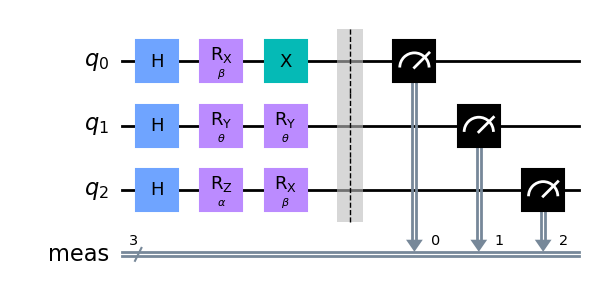

In [12]:
qc = QuantumCircuit(3)
qc.h([0, 1, 2])
qc.rx(beta, 0)
qc.ry(theta, 1)
qc.rz(alpha, 2)

qc.rx(beta, 2)
qc.ry(theta, 1)
qc.x(0)

qc.measure_all()


qc.draw('mpl')


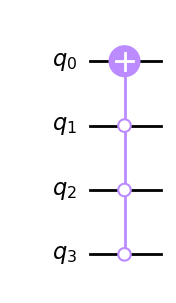

In [4]:
qc = QuantumCircuit(4)

qc.append(MCXGate(3, ctrl_state='000'), [2, 1, 3, 0])
qc.draw('mpl')

In [14]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library.standard_gates import RXGate
import numpy as np


beta_para = 2*np.pi*np.random.rand(1)[0]

# Create a quantum circuit
qc = QuantumCircuit(5)


MCRX = RXGate(beta_para).control(num_ctrl_qubits=4, ctrl_state='0000')

# Append the gate to the circuit
qc.append(MCRX, [1, 2, 3, 4, 0])

In [17]:
def ctrl_qubits(matrix, row_idx, col_idx):
    neighbors = []
    num_rows = len(matrix)
    num_cols = len(matrix[0])

    # Add neighbors from the same row
    for j in range(num_cols):
        if j != col_idx:  # Exclude the element itself
            neighbors.append(matrix[row_idx][j])

    # Add neighbors from the same column
    for i in range(num_rows):
        if i != row_idx:  # Exclude the element itself
            neighbors.append(matrix[i][col_idx])

    return neighbors
           

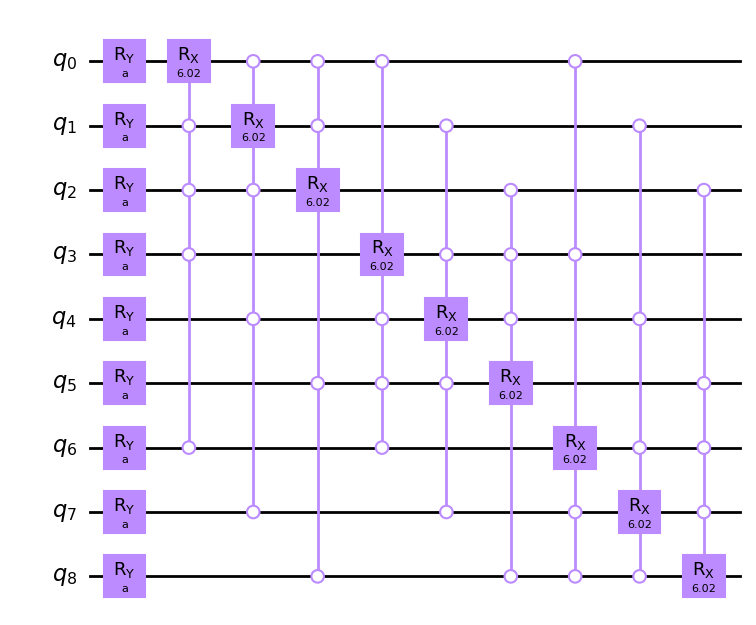

In [21]:
from qiskit.circuit.library.standard_gates import RYGate
n = 3
qc=QuantumCircuit(n*n)
a=Parameter('a')

ry = RYGate(a)
for qbit in range(n*n):
    qc.append(ry, [qbit])
    
MCRX = RXGate(beta_para).control(num_ctrl_qubits=4, ctrl_state='0000')
matrix = np.array([i for i in range(n*n)]).reshape(n, n)

for i in range(n):
    ctrl1 = [i]
    for j in range(n):  
        ctrl2 = list(ctrl_qubits(matrix, i, j))+[matrix[i][j]]
        qc.append(MCRX, ctrl2)

qc.draw('mpl')

[3, 4, 1, 2]

In [ ]:
import numpy as np
import ot

# Define the size of marginals
n = matrix.shape[0]
m = matrix.shape[1]

# Define your input matrix
matrix = np.array([[1, 1, 0],
                   [1, 0, 1],
                   [0, 1, 1]])

# Define the matching constraint
m_c = np.array([[0, 1, 0],
                [1, 0, 0],
                [0, 0, 1]])

# Define the cost matrix with the matching constraint
cost_matrix = np.multiply(matrix, m_c) # Element-wise multiplication to zero out non-matching elements

# Apply Sinkhorn algorithm to converge to a doubly stochastic matrix with the matching constraint
m_ds = ot.sinkhorn(np.ones(n) / n, np.ones(m) / m, cost_matrix, reg=0.01)

m_ds